# Task 2.2 - Data Insights

After data cleaning, it's time for some funny explorations. The goal is to find meaningful insights for customers and their purchasing behavior.  
You will see univariate, bivariate, and multivariate analysis; some clustering attempts. This work's outcome is the input for the marketing team, so the job done must be more accurate possible.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [2]:
transactions = pd.read_csv("../Data/transactions.csv")
customer_address = pd.read_csv("../Data/customer_address.csv")
customer_demographic = pd.read_csv("../Data/customer_demographic.csv")

In [3]:
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
transactions.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20


In [4]:
customer_address.head(3)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9


In [5]:
customer_demographic.head(3)

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,missing_job_title,missing_job_industry,age,age_bins
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,0,0,66,60-69
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,0,0,39,30-39
2,3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,0,0,66,60-69


## Exploratory Data Analysis

### Transaction dataset

#### Products

In [6]:
# Check what product_id most sold
transactions['product_id'].value_counts()

0      1154
3       349
1       305
38      267
35      261
       ... 
71      134
16      134
8       132
100     126
47      118
Name: product_id, Length: 101, dtype: int64

In [7]:
transactions[transactions['product_id']==0].head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
34,35,0,2171,2017-08-20,0.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22
39,40,0,2448,2017-11-28,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22
54,55,0,3140,2017-09-18,0.0,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,2005-05-10
60,61,0,1839,2017-02-24,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,1993-10-02
63,64,0,2000,2017-07-08,0.0,Approved,Trek Bicycles,Standard,medium,medium,499.53,388.72,2006-11-10


The product_id most sold is the product 0. We suppose that this product is of the same type.  
It's worth to inspect this and find how much is the impact of this product on the total profit.

In [11]:
# Add column profit for every transaction
transactions['profit'] = transactions['list_price'] - transactions['standard_cost']

# Create a groupby with count and profit fro each product
impact_product = transactions.groupby(['product_id'])['profit'].agg(['count','sum']).reset_index()

In [12]:
impact_product.head()

,product_id,count,sum
0,0,1154,103411.81
1,1,305,158739.66
2,2,236,6335.02
3,3,349,594189.95
4,4,235,161123.39


In [18]:
# Explore the impact of every product in percentage (count and profit)
impact_product['% total_count'] = round(impact_product['count']/impact_product['count'].sum()*100,2)
impact_product['% total_profit'] = round(impact_product['sum']/impact_product['sum'].sum()*100,2)

# Sort values for % of total profit
impact_product.sort_values('% total_profit', inplace=True, ascending=False)
impact_product.head(10)

,product_id,count,sum,% total_count,% total_profit
3,3,349,594189.95,1.80,5.54
38,38,267,306142.17,1.37,2.85
57,57,170,277142.50,0.87,2.58
46,46,193,254646.09,0.99,2.37
89,89,189,243093.21,0.97,2.27
12,12,223,237836.88,1.15,2.22
54,54,193,233890.92,0.99,2.18
37,37,151,233236.11,0.78,2.17
10,10,188,232885.84,0.97,2.17
63,63,170,229234.61,0.87,2.14


This exploration is very insightful. The most sold product_id, around 3x more sold than the second, is not in the top 10 of product_id for profit.  
Probably the combination of brand, size, and other features of the product, can help find more meaningful combinations.

#### Monthly sales

In [24]:
# Let's check the month
transactions['month'] = transactions['transaction_date'].dt.month
date_grouped = transactions.groupby('month').agg({'list_price':['sum','count']}).reset_index()
date_grouped.head()

month  list_price      
                sum count
0     1  1813840.55  1632
1     2  1744536.31  1578
2     3  1752618.98  1597
3     4  1791861.52  1613
4     5  1864538.66  1641

<AxesSubplot:xlabel='month', ylabel='sum'>

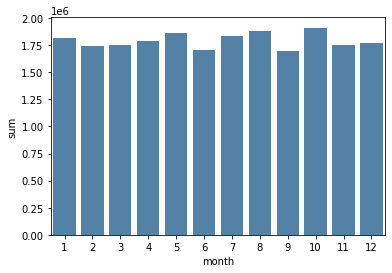

In [25]:
sns.barplot(x=date_grouped['month'],y=date_grouped['list_price']['sum'], color='steelblue')

#### Online order

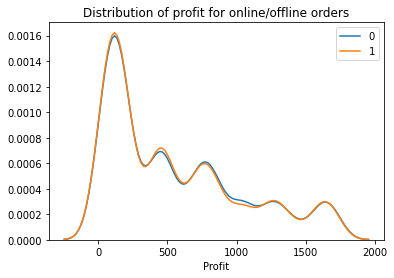

In [46]:
# Let's explore the distribution of profit for online order colum
online_order_0 = transactions[transactions['online_order']==0]
online_order_1 = transactions[transactions['online_order']==1]

# Plot the two distributions
sns.kdeplot(online_order_0['profit'], label='0')
sns.kdeplot(online_order_1['profit'], label='1')
plt.xlabel("Profit")
plt.title("Distribution of profit for online/offline orders")
plt.show()

Interesting plot that shows two things, one bad and one good:
* The bad one is that order online, or offline does not affect the profit (they have an identical distribution).
* The good one is that there are five peaks in these two distributions. A hypothesis can be that these peaks are five different clusters of products.

#### Order status

In [47]:
transactions['order_status'].value_counts()

Approved     19270
Cancelled      172
Name: order_status, dtype: int64

#### Brand

In [53]:
# Let's compare the brand sales and profit
brand = transactions.groupby('brand')['profit'].agg(['sum','count']).reset_index()

brand['% total_count'] = round(brand['count']/brand['count'].sum()*100,2)
brand['% total_profit'] = round(brand['sum']/brand['sum'].sum()*100,2)
brand.head(10)

,brand,sum,count,% total_count,% total_profit
0,Giant Bicycles,1541165.25,3244,16.69,14.37
1,Norco Bicycles,853161.52,2862,14.72,7.95
2,OHM Cycles,1453487.18,2992,15.39,13.55
3,Solex,2355726.12,4168,21.44,21.96
4,Trek Bicycles,1807321.10,2931,15.08,16.85
5,WeareA2B,2717685.68,3245,16.69,25.33


In [58]:
brand_melted = pd.melt(brand, id_vars=['brand'], value_vars=['% total_count','% total_profit'])
brand_melted.head()

,brand,variable,value
0,Giant Bicycles,% total_count,16.69
1,Norco Bicycles,% total_count,14.72
2,OHM Cycles,% total_count,15.39
3,Solex,% total_count,21.44
4,Trek Bicycles,% total_count,15.08


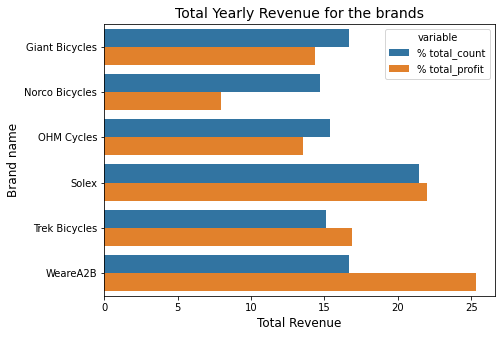

In [60]:
# Brand Revenue
plt.figure(figsize=(7,5))
clrs = ['steelblue' if (x < max(brand['sum'])) else 'green' for x in brand['sum']]

sns.barplot(y='brand', x='value', hue='variable', data=brand_melted)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Brand name', fontsize=12)
plt.title('Total Yearly Revenue for the brands', fontsize=14)
plt.show()

#### Product line

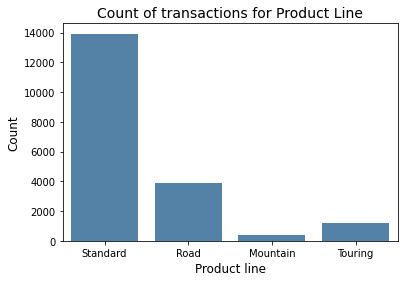

In [103]:
sns.countplot(transactions['product_line'], color='steelblue')
plt.xlabel('Product line', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of transactions for Product Line', fontsize=14)
plt.show()

#### Product class

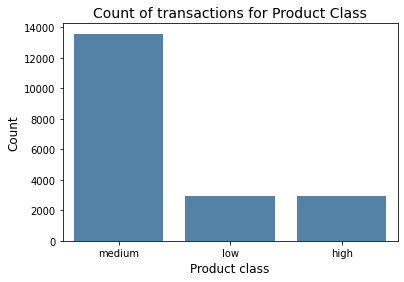

In [104]:
sns.countplot(transactions['product_class'], color='steelblue')
plt.xlabel('Product class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of transactions for Product Class', fontsize=14)
plt.show()

#### Product size

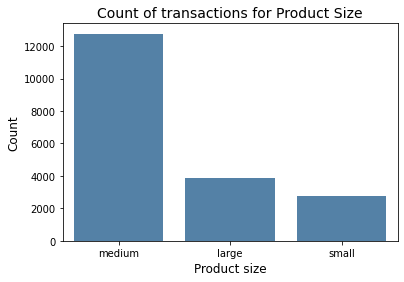

In [106]:
sns.countplot(transactions['product_size'], color='steelblue')
plt.xlabel('Product size', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of transactions for Product Size', fontsize=14)
plt.show()

#### List price

In [99]:
transactions['list_price'].describe()

count    19442.000000
mean      1107.429884
std        582.655811
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64

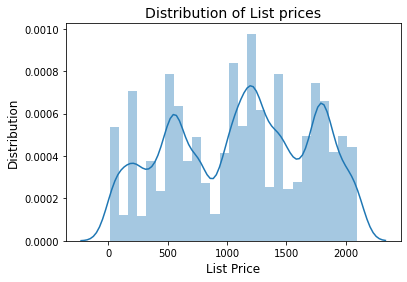

In [107]:
sns.distplot(transactions['list_price'])
plt.xlabel('List Price', fontsize=12)
plt.ylabel('Distribution', fontsize=12)
plt.title('Distribution of List prices', fontsize=14)
plt.show()

#### Top 10 most selled Product

In [114]:
best_products = transactions.groupby(['brand','product_line','product_class','product_size'])['product_id'].count().reset_index()
best_products.sort_values('product_id', inplace=True, ascending=False)
best_products.head(10)

,brand,product_line,product_class,product_size,product_id
31,Solex,Standard,medium,medium,1989
45,WeareA2B,Standard,medium,medium,1921
22,OHM Cycles,Standard,medium,medium,1066
5,Giant Bicycles,Standard,medium,medium,789
4,Giant Bicycles,Standard,medium,large,748
40,Trek Bicycles,Standard,medium,large,665
15,Norco Bicycles,Standard,medium,medium,591
2,Giant Bicycles,Standard,high,medium,578
20,OHM Cycles,Standard,high,medium,561
11,Norco Bicycles,Road,medium,medium,505


#### Distribution of list price for product line, product class and product size

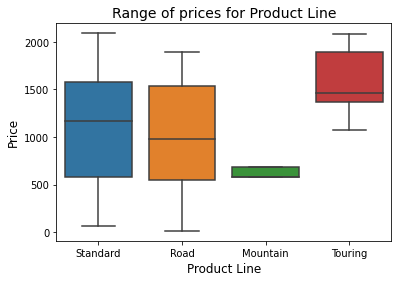

In [129]:
sns.boxplot(x='product_line', y='list_price', data=transactions)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Range of prices for Product Line', fontsize=14)
plt.show()

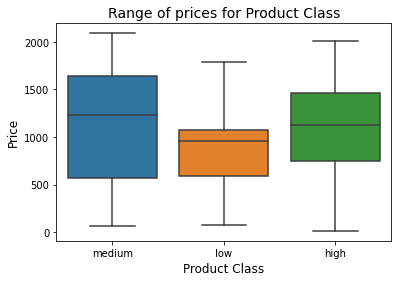

In [131]:
sns.boxplot(x='product_class', y='list_price', data=transactions)
plt.xlabel('Product Class', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Range of prices for Product Class', fontsize=14)
plt.show()

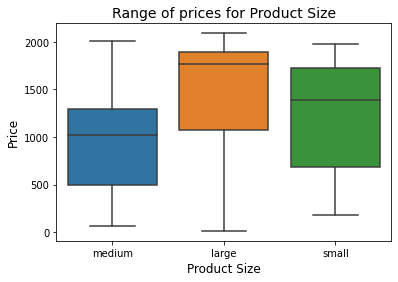

In [134]:
sns.boxplot(x='product_size', y='list_price', data=transactions)
plt.xlabel('Product Size', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Range of prices for Product Size', fontsize=14)
plt.show()

#### RFM Values

In [135]:
customer_demographic.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,missing_job_title,missing_job_industry,age,age_bins
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,0,0,66,60-69
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,0,0,39,30-39
2,3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,0,0,66,60-69
3,4,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1,0,58,50-59
4,5,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,0,1,43,40-49
